# Predicting Wine Quality from Chemical Characteristics
## Team 3 Final Project

Team 3 Members:  Tyler Foreman, Daniel Grant
Date:  June 6, 2023


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import statistics
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint



## Exploratory Data Analysis
 
 - Load data into dataframe
 - Generate and review descriptive statistics of the dataset/variables
 - Plot visualization of data spread for each variable
 - Review and plot correlations of variables to outcome (quality)
 - Possibly perform statistical analysis of variable correlations to outcomes
 - Analyze and develop hypothesis of varialbes with weak correlation to output (and can be excluded during feature selection)
 


In [15]:
# Start code here
white_wines_full = pd.read_csv('./winequality-white.csv', sep=';')
white_wines_full.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
# get descriptive statistics
white_wines_full.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


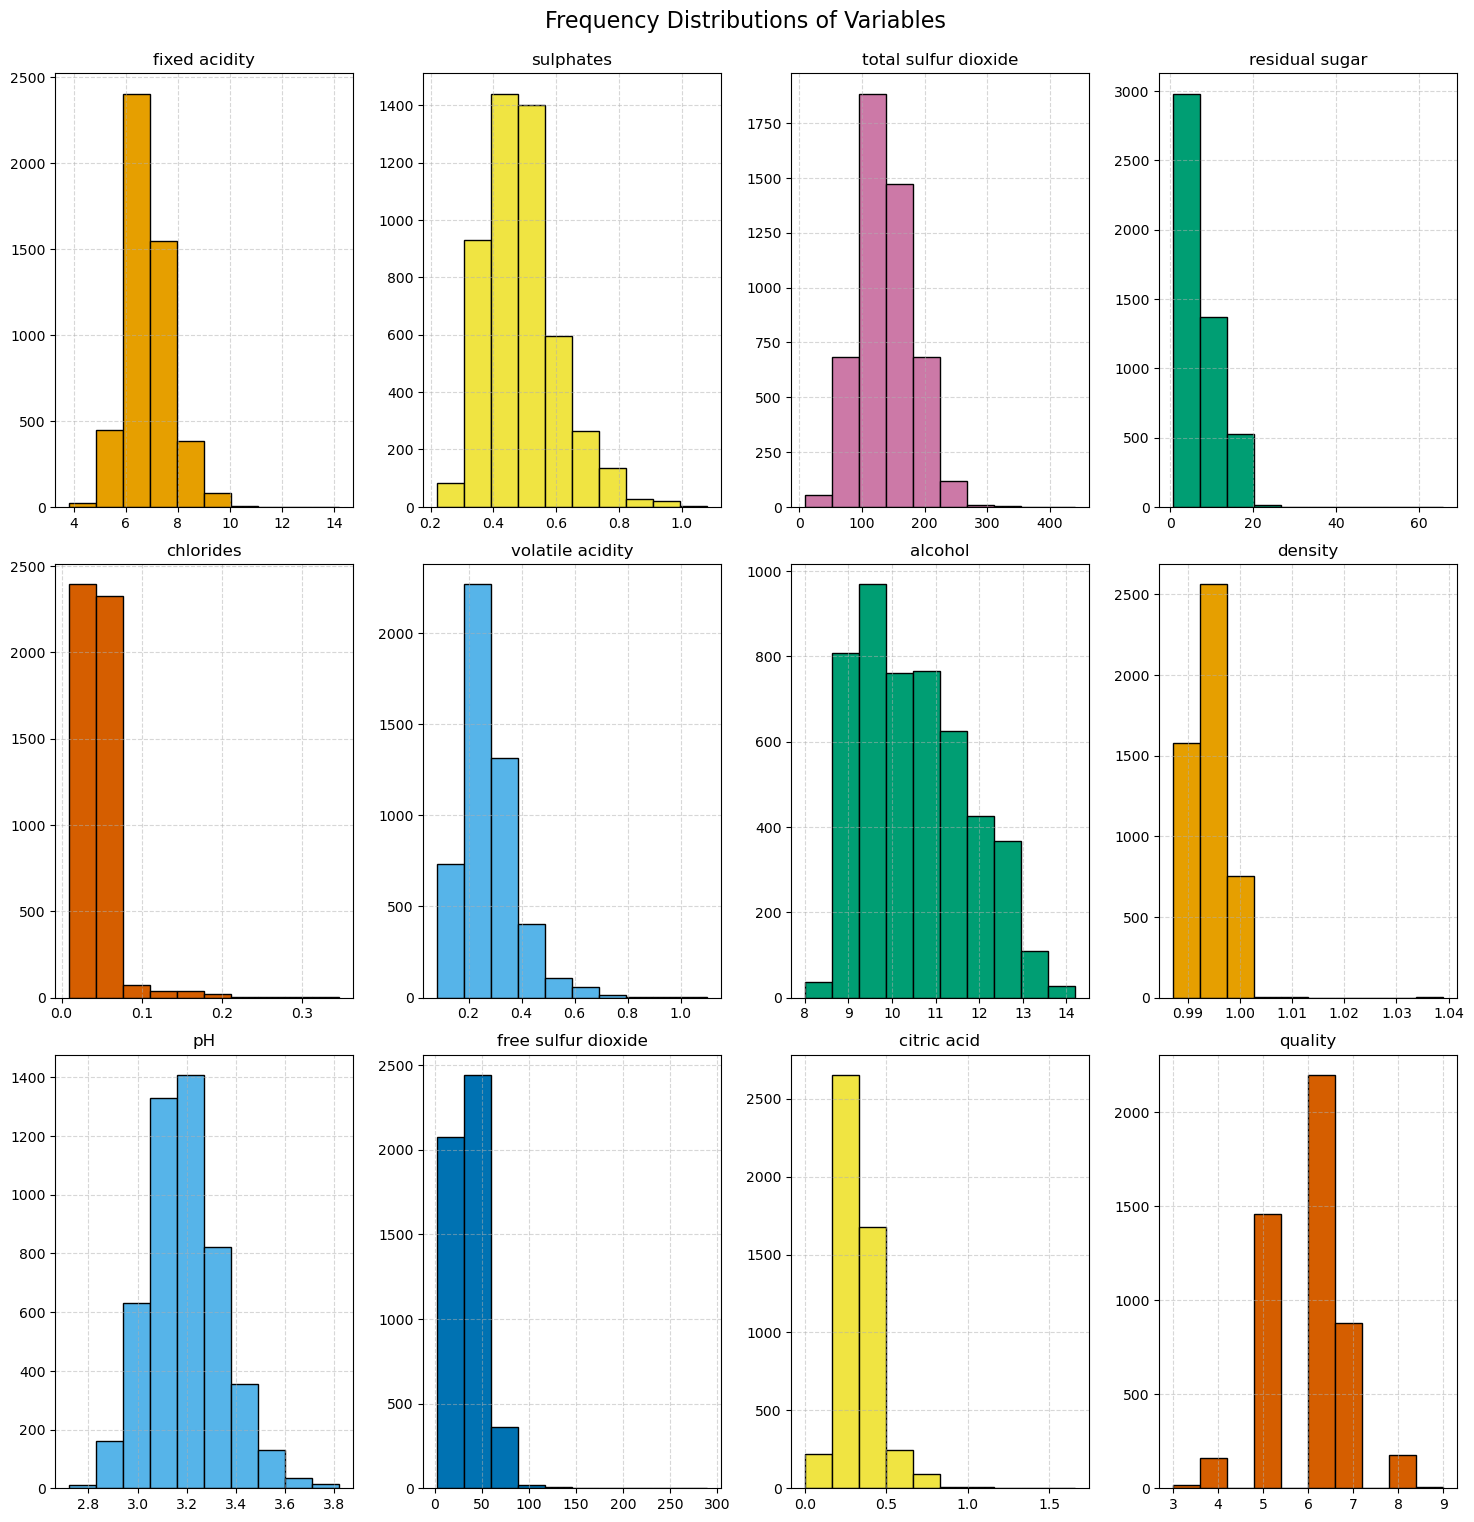

In [17]:
# plot variable distributions
fig, ax_list = plt.subplots(3, 4)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.tight_layout(pad=2)
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', '#0072B2', '#CC79A7']

# iterate columns (variables) and plot freqeuncy distribution
for i in range(len(white_wines_full.columns)):
    col = white_wines_full.columns[i]
    plt_ax = ax_list[i % 3, i % 4]
    plt_ax.hist(white_wines_full[col], color=colors[i % len(colors)], edgecolor='black')
    plt_ax.set_title(col, fontsize=12)
    plt_ax.grid(True, linestyle='--', alpha=0.5)

fig.suptitle('Frequency Distributions of Variables', fontsize=16, y=1.02)
plt.show()

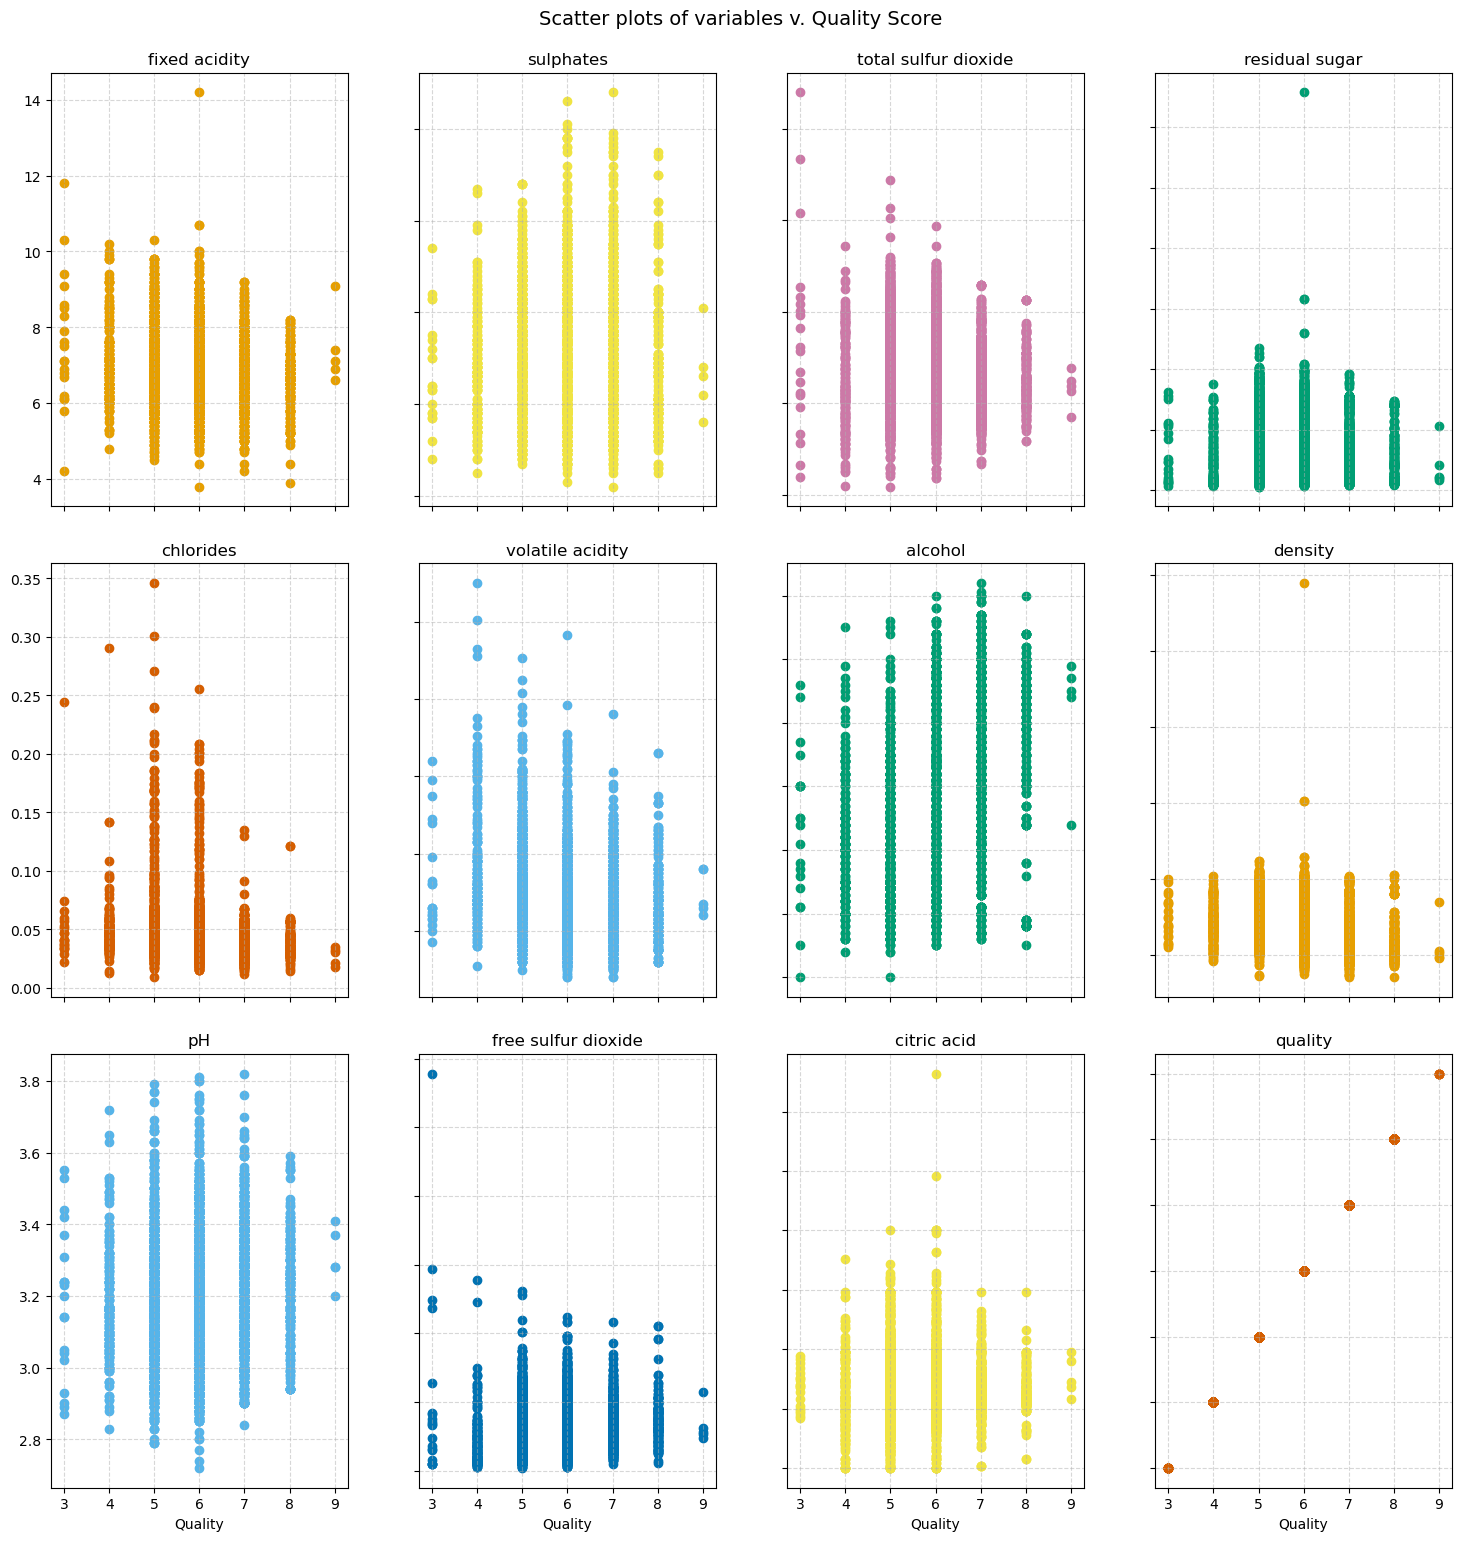

In [18]:
# plot variables vs. output
fig, ax_list = plt.subplots(3, 4)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.tight_layout(pad=2)
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', '#0072B2', '#CC79A7']

# iterate columns (variables) and plot vs. outcome
for i in range(0, len(white_wines_full.columns)):
    col = white_wines_full.columns[i]
    plt_ax = ax_list[i % 3, i % 4]
    plt_ax.scatter(white_wines_full['quality'], white_wines_full[col], color=colors[i % len(colors)])
    plt_ax.set_title(col, fontsize=12)
    plt_ax.set(xlabel='Quality')
    plt_ax.grid(True, linestyle='--', alpha=0.5)
    plt_ax.label_outer()

fig.suptitle('Scatter plots of variables v. Quality Score', fontsize=14, y=1.02)
plt.show()

Spearman correlation coefficient for variables:
       fixed acidity :              -0.0845
    volatile acidity :              -0.1966
         citric acid :               0.0183
      residual sugar :              -0.0821
           chlorides :              -0.3145
 free sulfur dioxide :               0.0237
total sulfur dioxide :              -0.1967
             density :              -0.3484
                  pH :               0.1094
           sulphates :               0.0333
             alcohol :               0.4404
             quality :                  1.0


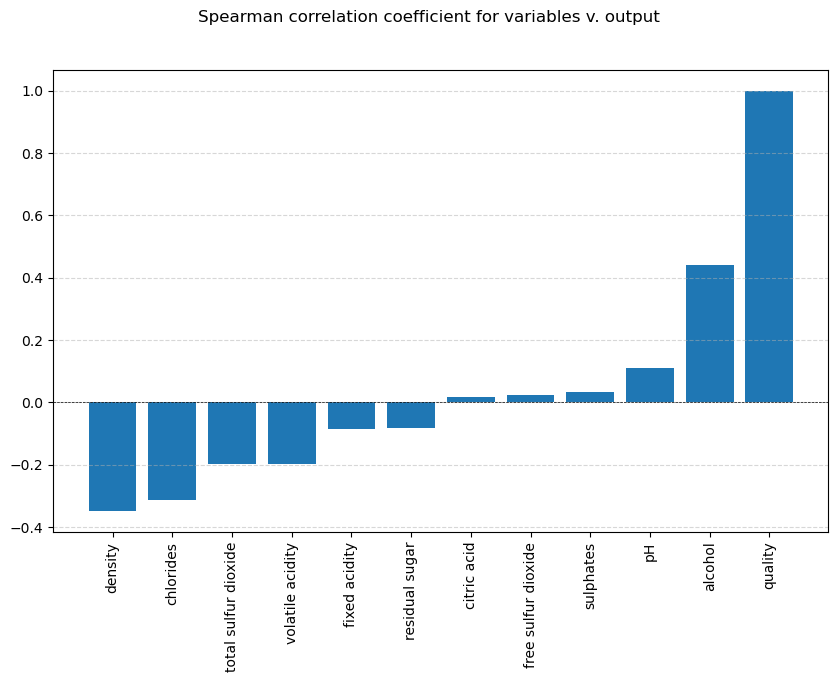

In [19]:
# Conduct Spearman correlation tests on each variable 
# vs. ordinal output ranking (Spearman used due to ordinal result)
print("Spearman correlation coefficient for variables:")
plot_data = {}
for i in range(0, len(white_wines_full.columns)):
    col = white_wines_full.columns[i]
    corr = stats.spearmanr(white_wines_full[col], white_wines_full['quality'])
    print("{: >20} : {: >20}".format(col, round(corr[0], 4)))
    plot_data[col] = corr[0]
sort_data = dict(sorted(plot_data.items(), key=lambda x: x[1]))

# generate bar graph plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='vertical', fontsize=10)
ax.axhline(0, color='black', linestyle='--', linewidth=0.5)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.bar(sort_data.keys(), sort_data.values())
fig.suptitle('Spearman correlation coefficient for variables v. output', fontsize=12)
plt.show()

### Exploratory data observations

#### Correlation summary

|         | No Correlation    | Low Correlation | Moderate Correlation |
|---------|-------------------|-----------------|----------------------|
|Positive | free sulfer dioxide, sulfates | pH    | alcohol
|Negative | citric acid       | fixed acidity   | volatile acidity, chlorides, total sulfur dioxide, density|

**For feature selection, in addition to dataset with all features, recommend experiments with:**

- Include only moderately correlated features (positive and negative): ***volatile acidity, chlorides, total sulfur dioxide, density, alcohol***
- Include only moderate and low correlated features (positive and negative): ***volatile acidity, chlorides, total sulfur dioxide, density, alcohol, fixed acidity, pH, sulfates***


## Data Cleaning
 - Evaluate for possible corrupted values (ie: possibly erronous)
 - Evaluate for any missing data/data gaps
 - Remove any entries that are missing data or appear to be erronous
 

In [20]:
# Start code here
# Drop any null values, duplicates, and round all numbers to certain decimal places.
white_wines_full.dropna()
white_wines_full.drop_duplicates()
decimals = pd.Series([1,2,2,1,3,0,0,3,2,2,1,0], index=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
white_wines_full.round(decimals)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.995,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.991,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.995,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.993,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.989,3.34,0.38,12.8,7


In [21]:
des = white_wines_full.describe()
round(des, 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [22]:
white_wines_full.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2279,7.1,0.4,0.52,1.3,0.148,45.0,149.0,0.99468,3.08,0.56,8.7,5


## Data Preparation
-  Slice dataframe into multiple dataframes that contain subset of variables for feature selection experimentation (based on exploratory data analysis)
-  Keep full feature dataset as control set (ie: to compare model performance of feature selected datasets to the full dataset)
-  Split each experimental dataframe into test/train/validate datasets (80/10/10)
-  Perform any normalization of variables if necessary

In [134]:
# Include only moderately correlated features (positive and negative): ***volatile acidity, chlorides, total sulfur dioxide, density, alcohol***
# Include only moderate and low correlated features (positive and negative): ***volatile acidity, chlorides, total sulfur dioxide, density, alcohol, fixed acidity, pH, sulphates***

variables = [
    
    ['fixed acidity', 'volatile acidity', 'citric acid'],
    ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol'],
    ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol', 'fixed acidity', 'pH', 'sulphates']    
    #['residual sugar', 'chlorides', 'free sulfur dioxide'],
    #['total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
]

experimental_dfs = []
control_df = white_wines_full.copy()
train_data = []
test_data = []
val_data = []
# for normalization
scaler = StandardScaler()

# slice the dataframe and perform feature selection experimentation
for variable in variables:
    experimental_df = white_wines_full[variable].copy()
    experimental_dfs.append(experimental_df)

    # normalize variables for each experimental dataframe
    experimental_df = pd.DataFrame(scaler.fit_transform(experimental_df), columns=experimental_df.columns)

    # split the experimental dataframe into train/test/validate datasets
    X = experimental_df.copy()
    y = white_wines_full['quality'].copy()
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)
    train_data.append((X_train, y_train))
    test_data.append((X_test, y_test))
    val_data.append((X_val, y_val))

# normalize for control dataset
control_df = pd.DataFrame(scaler.fit_transform(control_df), columns=control_df.columns)

# split the control dataset into train/test/validate datasets
control_df = control_df.drop(columns=['quality'])

X = control_df.copy()
y = white_wines_full['quality'].copy()
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)
train_data.append((X_train, y_train))
test_data.append((X_test, y_test))
val_data.append((X_val, y_val))


## Model Selection
-  Identify 2 models to conduct experiements with (ie: SVM and Random Forest)
-  Train the 2 models on the full feature dataset
-  Test against test dataset
-  Tune hyperparameters as necessary to optimize performance
-  Repeat until optimized
-  Once optimized, retrain instances on the feature selected experimental data sets


## Random Forest Classifier

In [140]:
# Random Forest Classifier Model Experiment Functions

def rf_classifier_train(rf, X_train, y_train):
    rf.fit(X_train, y_train)

def rf_classifier_run_experiment(rf, X_exp, y_exp):
    
    # Run prediction on experiment data
    y_pred = rf.predict(X_exp)

    accuracy = accuracy_score(y_exp, y_pred)
    precision = precision_score(y_exp, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_exp, y_pred, average='macro', zero_division=0)

    print("Accuracy:", round(accuracy, 3))
    print("Precision:", round(precision, 3))
    print("Recall:", round(recall, 3))

    # Create the confusion matrix
    labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    cm = confusion_matrix(y_exp, y_pred, labels=labels)
    
    ConfusionMatrixDisplay(confusion_matrix=cm).plot();
    plt.title('Confusion matrix [0=poor to 10=excellent]')

def rf_feature_importance_plot(rf, X_data):
    
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=X_data.columns)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()


## Experiment 1: Train on Control dataset, Random Forest Classifier

In [141]:
# Start with control dataset - Train with train_data
X_train, y_train = train_data[3]

# Initialize model and train
rf = RandomForestClassifier()
x = rf_classifier_train(rf, X_train, y_train)


Accuracy: 0.686
Precision: 0.656
Recall: 0.442


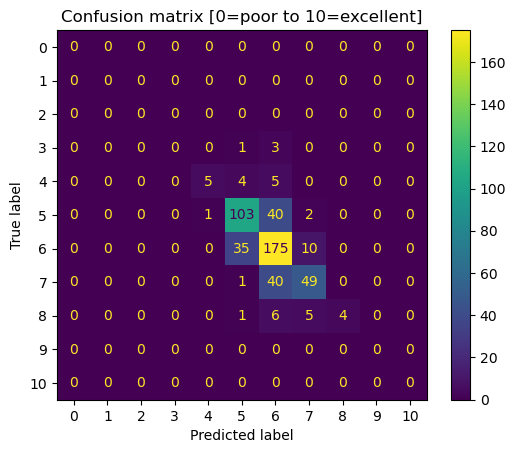

In [142]:
# Run on test set
X_test, y_test = test_data[3]
rf_classifier_run_experiment(rf, X_test, y_test)

Accuracy: 0.72
Precision: 0.576
Recall: 0.482


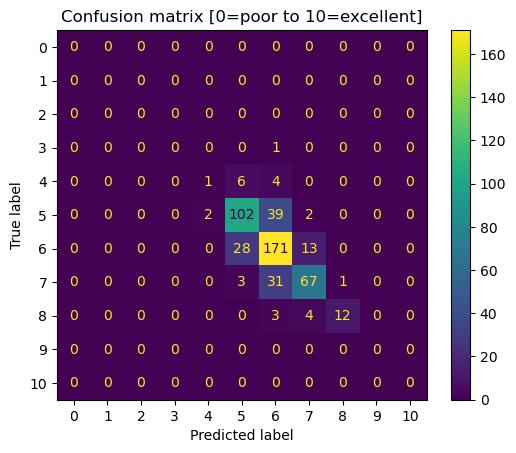

In [143]:
# Run on validation set
X_val, y_val = val_data[3]
rf_classifier_run_experiment(rf, X_val, y_val)

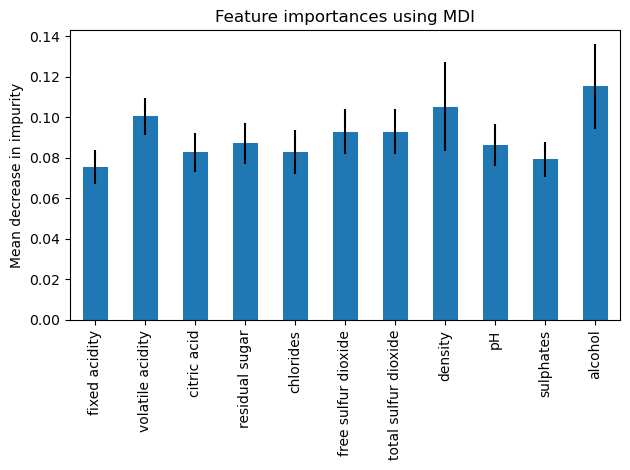

In [144]:
# plot feature importances
rf_feature_importance_plot(rf, X_val)


## Experiment 2: Feature Selection, train on dataset with only moderately correlated variables, Random Forest Classifier

In [106]:
# Start with control dataset - Train with train_data
X_train, y_train = train_data[1]

# Initialize model and train
rf = RandomForestClassifier()
x = rf_classifier_train(rf, X_train, y_train)

Accuracy: 0.661
Precision: 0.524
Recall: 0.409


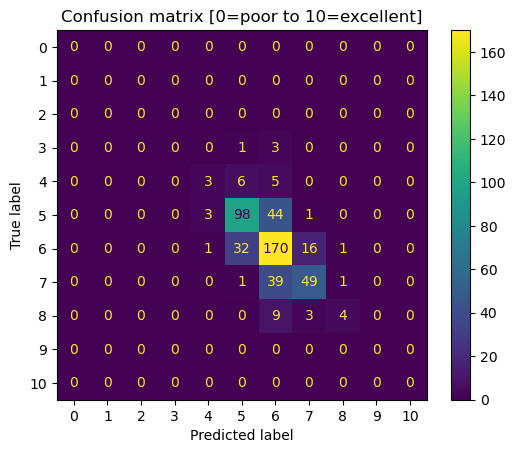

In [107]:
# Run on test set
X_test, y_test = test_data[1]
rf_classifier_run_experiment(rf, X_test, y_test)

Accuracy: 0.673
Precision: 0.536
Recall: 0.446


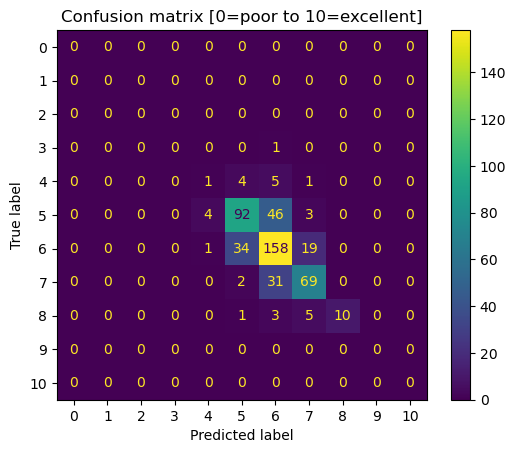

In [108]:
# Run on validation set
X_val, y_val = val_data[1]
rf_classifier_run_experiment(rf, X_val, y_val)

## Experiment 3: Feature Selection, train on dataset with moderately and low correlated variables, Random Forest Classifier

In [109]:
# Start with control dataset - Train with train_data
X_train, y_train = train_data[2]

# Initialize model and train
rf = RandomForestClassifier()
x = rf_classifier_train(rf, X_train, y_train)

Accuracy: 0.68
Precision: 0.683
Recall: 0.427


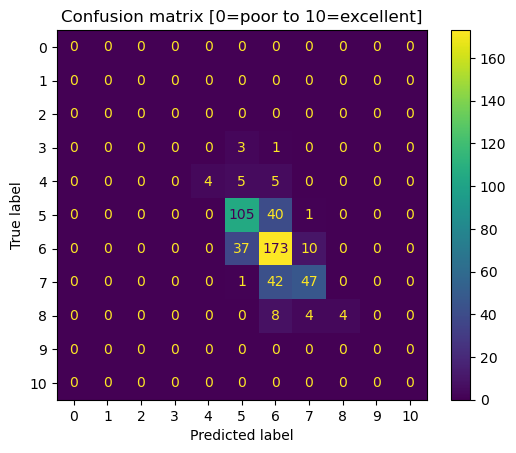

In [110]:
# Run on test set
X_test, y_test = test_data[2]
rf_classifier_run_experiment(rf, X_test, y_test)

Accuracy: 0.682
Precision: 0.575
Recall: 0.454


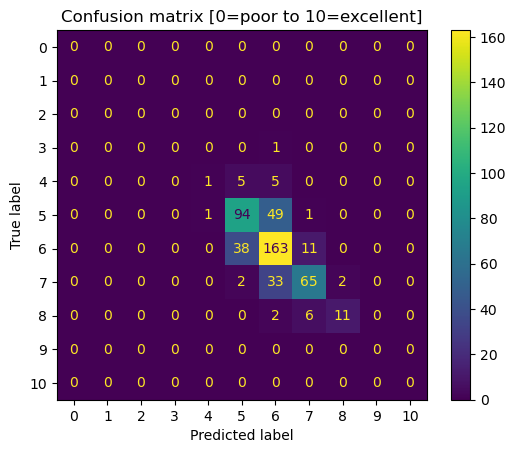

In [111]:
# Run on validation set
X_val, y_val = val_data[2]
rf_classifier_run_experiment(rf, X_val, y_val)

In [25]:
# Start Code Here

## Model Analysis

-  For full feature data set:
    -  Run models against validation data sets 
    -  Evaluate performance
    -  Compare peformance of two models against validation sets
    -  Make recommendation on model selection

- For each experimental feature selected dataset:
    -  Run models against validation data sets 
    -  Evaluate performance
    -  Compare peformance of two models against validation sets
    -  Make recommendation on feature selection (which features are important and those that are not for making accurate predictions)



In [26]:
# Start code here